## Linear Regression on Boston Houses Dataset
- Exploratory Analysis

## Section - 1 Exploratory Analysis
- Load
- Analyse
- Visualise
- Normalize

- sklearn is a library which provides us some common dataset on the internet.
- we can import any dataset online using  
`from sklearn.datasets import <dataset_name>`

In [2]:
from sklearn.datasets import load_boston

In [4]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [9]:
X = data
y = target

In [10]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [11]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [13]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
## Let us convert this dataset to a dataframe as dataframe gives slightly better view 
import pandas as pd
df = pd.DataFrame(X)
df.columns = boston.feature_names  # pass feature names list as column names to the datframe
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [53]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


- This data is not normalized as they have different scale of mean and std.

#### Normalizing data:
- The goal of **normalization is to change the values of numeric columns in the dataset to use a common scale**, without distorting differences in the ranges of values or losing information.
- We most commonly normalize data by converting them to 0 mean and 1 std. We use this common scale for all the data.
- By normalizing data, we get better and fast results.

In [25]:
# Normalise this dataset
# Each feature must have 0 mean, unit variance
import numpy as np
u = np.mean(X,axis=0)   # It gives mean for every feature rowise
std = np.std(X,axis=0)  # It gives std for every feature rowise
print(u.shape,std.shape)

# if we do not pass axis=0 then np.mean(X) will calculate mean of all the array resulting in 
# a single scalar value. By passing axis=0, it finds rowwise mean for all 13columns

(13,) (13,)


In [26]:
# Normalise the Data
X = (X-u)/std  # X is matrix and u,std are row vectors. So we use broadcasting here

In [27]:
# Normalised Data
pd.DataFrame(X[:5,:]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [28]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,8.425408e-17,-7.372232e-17,5.616939e-17,3.510587e-17,-2.808469e-17,3.510587e-17,-7.021173e-18,0.000000,-1.123388e-16,1.123388e-16,8.425408e-17,4.212704e-17,-2.808469e-17
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-0.805688,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-0.279323,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,0.662371,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


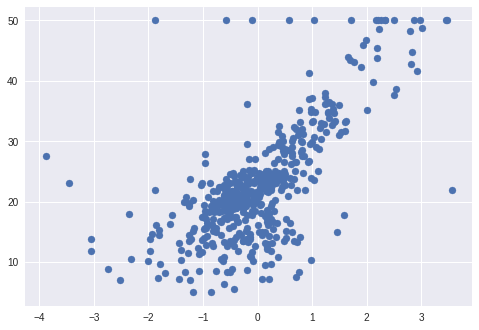

In [29]:
# Plot Y vs 5th feature
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.scatter(X[:,5],y)  # plot 5th feature vs y_output
plt.show()

## Section - 2 Linear Regression on Multiple Features
- Boston Housing Dataset

In [61]:
X.shape, y.shape

((506, 13), (506,))

In [30]:
# create ones vector with no. of rows= X.shape[0] and no. of columns=1
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))  # add this ones vector at the begining of X 
print(X.shape)

(506, 14)


In [31]:
X[0]

array([ 1.        , -0.41978194,  0.28482986, -1.2879095 , -0.27259857,
       -0.14421743,  0.41367189, -0.12001342,  0.1402136 , -0.98284286,
       -0.66660821, -1.45900038,  0.44105193, -1.0755623 ])

In [32]:
# X - Matrix ( m x n)
# x - Vector (Single Example with n features)

def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_  += (theta[i]*x[i])
    return y_
## see hypothesis function from 06file.pdf notes

In [33]:
# error function remains same as in case of single feature. Only difference is in hypotheis func.
def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e += (y[i] - y_)**2
        
    return e/m

In [34]:
def gradient(X,y,theta):
    m,n = X.shape
    # for n=14 featues, we need to create grad vector of size 14
    grad = np.zeros((n,))
    
    # for all values of j  
    for j in range(n):    #this loop is to find all the 14 gradients
       #sum over all examples  
        for i in range(m):   #this loop is to calculate single gradient by adding (y_ - y)*x[i]
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]
    # Out of the loops
    return grad/m
### see formula of this in our 06file.pdf notes.

In [38]:
## finally gradient descent algorithm
def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):  # max steps=300
    m,n = X.shape
    theta = np.zeros((n,))  # create empty theta vector of size n=14
    error_list = []   # create empty list to store error in each iteration
     
    for i in range(max_epochs):
        e = error(X,y,theta)  # calculate error in each iteration
        error_list.append(e)  # store error at each iteration in a list for data visualization
        
        # Gradient Descent implementation
        grad = gradient(X,y,theta)  # find gradient for all 14theta
        for j in range(n):  # this for loop is to update theta for all 14 thetas
            theta[j] = theta[j] - learning_rate*grad[j]   # update theta now
        
    return theta,error_list

In [39]:
# X - Matrix ( m x n)
# x - Vector (Single Example with n features)

def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_  += (theta[i]*x[i])
    return y_

def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e += (y[i] - y_)**2
        
    return e/m

def gradient(X,y,theta):
    m,n = X.shape
    
    grad = np.zeros((n,))
    
    # for all values of j
    for j in range(n):
        #sum over all examples
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]
    # Out of the loops
    return grad/m

def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        # Gradient Descent
        grad = gradient(X,y,theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
        
    return theta,error_list

In [40]:
import time
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print("Time taken is ", end-start)

Time taken is  11.139537334442139


## Quite Slow! 11 Seconds! Just 506 examples in the training data!

In [41]:
print(theta)  # this is our final theta which is best for our line

[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


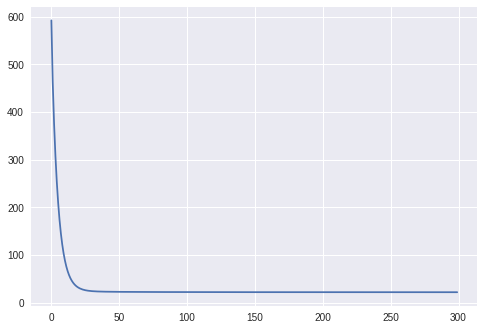

In [43]:
plt.plot(error_list)  # let us plot error in each iteration that we stored in error_list
plt.show()

## Predictions

In [46]:
y_ = []
m,n = X.shape

for i in range(m):
    pred = hypothesis(X[i],theta)
    y_.append(pred)
y_ = np.array(y_)
y_

array([30.18633694, 24.99095484, 30.56568098, 28.6220126 , 27.9619464 ,
       25.24452832, 22.96581931, 19.4959112 , 11.48031987, 18.87883585,
       18.97129884, 21.54039453, 20.89285327, 19.60128149, 19.32367393,
       19.3458686 , 20.59832729, 16.95783793, 16.23493881, 18.44548854,
       12.55479461, 17.70925422, 15.88547043, 13.84190443, 15.71570947,
       13.4205508 , 15.49775358, 14.75818241, 19.59955913, 20.93977682,
       11.49745095, 18.09361635,  8.88301038, 14.31610222, 13.75983633,
       23.77730951, 22.30988941, 23.08772244, 22.90940545, 31.27562517,
       34.14934567, 27.99150715, 25.15161107, 24.56195221, 22.86665722,
       22.01299699, 20.35079995, 17.94239765,  9.0032359 , 17.10959314,
       21.16463059, 23.8404942 , 27.56319999, 23.94281148, 15.70766609,
       30.96324445, 24.93746243, 32.91466583, 21.63293708, 20.92400291,
       17.6977369 , 18.32617385, 23.82616369, 22.4283064 , 23.34895856,
       30.37522177, 25.5255783 , 21.2306401 , 17.52571154, 20.89

In [47]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

In [48]:
# SCORE
r2_score(y,y_)

74.04541323942739

### Section-3 Optimising Code using Vectorization
An Efficent Implemenation for Linear Regression using Vectorization
- Avoid loops in the implemenation, except gradient descent main loop
- Use numpy functions like ```np.sum()```, ```np.dot()``` which are quite fast and already optimised

In [49]:
def hypothesis(X,theta):
    return np.dot(X,theta)

In [50]:
def error(X,y,theta):
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/m

In [51]:
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
      # see the formula for gradient and match with this dot product. Try it on copy
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

In [52]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/m
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list
    


In [56]:
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print("Time taken by Vectorized Code",end-start)

Time taken by Vectorized Code 0.016804933547973633


## Really Very Fast! :D

In [57]:
theta

array([ 2.25328063e+01, -9.03091692e-01,  1.03815625e+00,  1.53477685e-02,
        6.99554920e-01, -2.02101672e+00,  2.70014278e+00, -1.93085233e-03,
       -3.10234837e+00,  2.34354753e+00, -1.72031485e+00, -2.04614394e+00,
        8.47845679e-01, -3.73089521e+00])

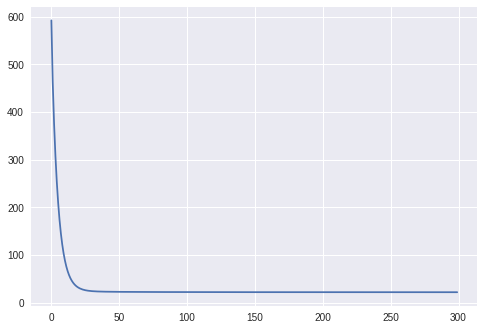

In [58]:
plt.plot(error_list)
plt.show()

In [59]:
## Predictions
y_ = hypothesis(X,theta)
r2_score(y,y_)

74.04541323942739